In [2]:
import numpy as np
import openpyxl
from pandas import DataFrame, read_csv, merge
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
def plot_bars(x_vals, y_vals, fig_size=(5, 4), x_label=None, y_label=None, title=None, pct=None,
             rotation=0, pf=None):
    ld_norm = 1e6
    usd_norm = 1e3
    if pct:
        x_vals = x_vals[:-1]
        total = y_vals[-1]
        y_vals = y_vals[:-1]
        y_vals = 100 * (y_vals / total)
        y_label = 'PCT OF PORTFOLIO'
    if pf and pf.lower() == 'ld':
        if title is None:
            title = 'DISBURSED LD PORTFOLIO'
        if pct is None:
            y_vals = y_vals / ld_norm
            y_label = 'LD ( MM )'
    elif pf and pf.lower() == 'usd':
        if title is None:
            title = 'DISBURSED USD PORTFOLIO'
        if pct is None:
            y_vals = y_vals / usd_norm
            y_label = 'USD ( KK )'
    elif pf and pf.lower() == 'total':
        if title is None:
            title = 'DISBURSED Total PORTFOLIO (USD)'
        if pct is None:
            y_vals = y_vals / usd_norm
            y_label = 'USD ( KK )'
    x_pos = np.arange(1, len(x_vals) + 1)
    plt.figure(figsize=fig_size)
    plt.bar(left=x_pos, height=y_vals, color='lightblue', width=0.8)
    locs, labels = plt.xticks(x_pos, x_vals)
    plt.setp(labels, rotation=rotation) 
    pct_vals = 100 * (y_vals[:2] / y_vals[-1])
    for xyz in zip(x_pos[:2], y_vals[:2], pct_vals): 
        plt.annotate('%.2f%s' % (xyz[-1], '%'), xy=[xyz[0] -0.2, xyz[1]], textcoords='data', fontsize='large')
    
    if pct:
        plt.yticks(np.arange(0, 100, 10))
    if x_label:
        plt.xlabel(x_label)
    if y_label:
        plt.ylabel(y_label)
    if title:
        plt.title(title)
    plt.tight_layout()

In [4]:
ifile = 'disbursed.csv'
disbursed = read_csv(ifile)

ifile = 'current_status.csv'
cur_status = read_csv(ifile)

ifile = 'new_loan.csv'
loan = read_csv(ifile)

ifile = 'new_payment.csv'
pmt = read_csv(ifile)

In [5]:
disbursed

,loan_type,nbr_ld_loans,loan_amt_ld,nbr_usd_loans,loan_amt_usd,total_usd_plus_ld
0,business,19,238300.0,11,2300.0,4372.173913
1,personal,4,27250.0,17,1925.0,2161.956522
2,total,23,265550.0,28,4225.0,6534.130435


In [6]:
cur_status

,collected,disbursed,disbursed_plus_interest,uncollected,expenses,beginning_cap,cash_on_hand
0,3613.01087,6534.130435,7740.358696,4127.347826,225.0,5000.0,1853.880435


In [8]:
loan.head(5)

,loan_id,loan_type,amt_requested,loan_amt_usd,loan_amt_ld,rate,interest_ld,interest_usd,duration_month,status,take_out_dt,loan_plus_intr_ld,loan_plus_intr_usd
0,L01,p,0usd,NaN,NaN,0.0,NaN,NaN,0.0,approved,2017-01-01,NaN,NaN
1,L02,b,200usd,NaN,23000.0,20.0,4600.0,NaN,3.0,approved,2017-08-12,27600.0,NaN
2,L03,b,50usd,NaN,5750.0,20.0,1150.0,NaN,3.0,approved,2017-08-15,6900.0,NaN
3,L04,b,200usd,NaN,23000.0,20.0,4600.0,NaN,3.0,approved,2017-08-14,27600.0,NaN
4,L05,b,200usd,200.0,NaN,20.0,NaN,40.0,3.0,approved,2017-08-12,NaN,240.0


In [9]:
pmt.head(5)

,id,loan_id,loan_plus_intr_usd,loan_plus_intr_ld,payment_dt,payment_amt_usd,payment_amt_ld,loan_bal_usd,loan_bal_ld
0,1,L01,NaN,NaN,2017-03-01,0.0,0.0,NaN,NaN
1,1,L01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,L01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,L02,NaN,27600.0,2017-09-12,NaN,9200.0,NaN,18400.0
4,2,L02,NaN,27600.0,2017-10-12,NaN,9200.0,NaN,9200.0


In [28]:
19 / 23

0.8260869565217391

### loan disbursed so far

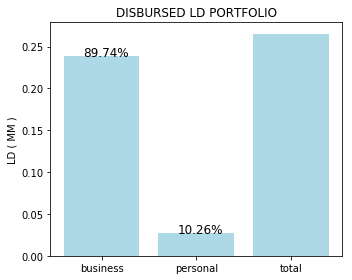

In [24]:
ld_y_vals = disbursed.loan_amt_ld.values
ld_x_vals = disbursed.loan_type.values
plot_bars(x_vals=ld_x_vals, y_vals=ld_y_vals, pf='LD', pct=None)
ifile = 'ttl_ld_pf_amt.png'
# plt.savefig(ifile, dpi=300, bbox_inches='tight')
plt.show()

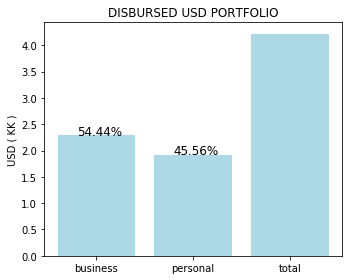

In [25]:
usd_y_vals = disbursed.loan_amt_usd.values
usd_x_vals = disbursed.loan_type.values
plot_bars(x_vals=usd_x_vals, y_vals=usd_y_vals, pf='USD', pct=None)
# ifile = 'ttl_usd_pf_amt.png'
# plt.savefig(ifile, dpi=300, bbox_inches='tight')
plt.show()

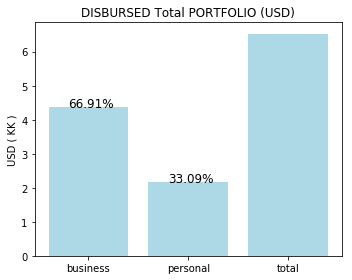

In [26]:
ttl_y_vals = disbursed.total_usd_plus_ld.values
ttl_x_vals = disbursed.loan_type.values
plot_bars(x_vals=ttl_x_vals, y_vals=ttl_y_vals, pf='total', pct=None)
# ifile = 'ttl_pf_amt.png'
# plt.savefig(ifile, dpi=300, bbox_inches='tight')
plt.show()

### Collection progress

In [17]:
cur_status

,collected,disbursed,disbursed_plus_interest,uncollected,expenses,beginning_cap,cash_on_hand
0,3613.01087,6534.130435,7740.358696,4127.347826,225.0,5000.0,1853.880435


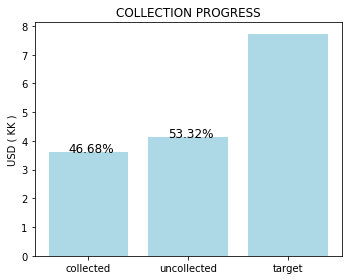

In [27]:
xvals = np.array(['collected', 'uncollected', 'target'])
yvals = np.array([cur_status.collected.values[0], cur_status.uncollected.values[0], 
                  cur_status.disbursed_plus_interest.values[0]])
plot_bars(x_vals=xvals, y_vals=yvals, pf='usd', pct=None, title='COLLECTION PROGRESS')

